In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
tweets = pd.read_excel("./data/authored_politician_tweets_10_1.xlsx")

In [6]:
tweets.head()

,id,tweet_url,created_at,parsed_created_at,user_screen_name,text,tweet_type,coordinates,hashtags,media,...,user_favourites_count,user_followers_count,user_friends_count,user_listed_count,user_location,user_name,user_statuses_count,user_time_zone,user_urls,user_verified
0,1576286575704547328,https://twitter.com/wileynickel/status/1576286...,Sat Oct 01 19:03:00 +0000 2022,2022-10-01T19:03:00+00:00,wileynickel,Know any potential new North Carolina voters? ...,original,NaN,NaN,NaN,...,25004,38847,649,182,North Carolina,Wiley Nickel for Congress,11220,NaN,http://www.wileynickelforcongress.com,True
1,1576272483648667648,https://twitter.com/wileynickel/status/1576272...,Sat Oct 01 18:07:00 +0000 2022,2022-10-01T18:07:00+00:00,wileynickel,The Cook Political Report has our race listed ...,original,NaN,NC13,https://pbs.twimg.com/media/FeALeCkXgAQjh-k.jpg,...,25004,38847,649,182,North Carolina,Wiley Nickel for Congress,11220,NaN,http://www.wileynickelforcongress.com,True
2,1576261081793982464,https://twitter.com/wileynickel/status/1576261...,Sat Oct 01 17:21:42 +0000 2022,2022-10-01T17:21:42+00:00,wileynickel,"Say hello to Daisy Belle, our newest #TeamWile...",original,NaN,TeamWiley TeamWiley,https://pbs.twimg.com/media/FeABGX3XwAYuLIy.jpg,...,25004,38847,649,182,North Carolina,Wiley Nickel for Congress,11220,NaN,http://www.wileynickelforcongress.com,True
3,1576253817078763520,https://twitter.com/wileynickel/status/1576253...,Sat Oct 01 16:52:50 +0000 2022,2022-10-01T16:52:50+00:00,wileynickel,The Garner Firemen's Festival parade was cance...,original,NaN,NaN,https://pbs.twimg.com/media/Fd_6e12XoAAL1kY.jp...,...,25004,38847,649,182,North Carolina,Wiley Nickel for Congress,11220,NaN,http://www.wileynickelforcongress.com,True
4,1576225926295085057,https://twitter.com/wileynickel/status/1576225...,Sat Oct 01 15:02:00 +0000 2022,2022-10-01T15:02:00+00:00,wileynickel,The Roe v Wade decision goes against the will ...,original,NaN,RoevWade,https://pbs.twimg.com/media/FdmMpUgXoAIdF0r.jpg,...,25004,38847,649,182,North Carolina,Wiley Nickel for Congress,11220,NaN,http://www.wileynickelforcongress.com,True


In [11]:
tweets_by_accounts = tweets.groupby(['user_screen_name']).agg({"id":"count"})

In [24]:
party_map = {'wileynickel':'Democrat', 'BoHines':"Republican", 'Yvette4congress':"Republican", 'RepHerrell':"Republican",
       'Gabe_NM':'Democrat', 'VoteAprilBecker':"Republican", 'SusieLeeNV':'Democrat', 'RepSusieLee':'Democrat',
       'KistnerCongress':"Republican", 'AngieCraigMN':'Democrat', 'RepAngieCraig':'Democrat', 'RepGolden':'Democrat',
       'RepDavids':'Democrat', 'sharicedavids':'Democrat', 'amanda_adkins':"Republican", 'esther4congress':"Republican",
       'ERICSORENSEN':'Democrat', 'YadiraCaraveo':'Democrat', 'Kirkmeyer4CO':"Republican", 'RepOHalleran':'Democrat',
       'EliCraneAZ':"Republican", 'NBegich':"Republican", 'MaryPeltola':'Democrat', 'SarahPalinUSA':"Republican",
       'EvanMcMullin':"Independent", 'SenMikeLee':"Republican", 'GenDonBolduc':"Republican", 'SenatorHassan':'Democrat',
       'DrOz':"Republican", 'JohnFetterman':'Democrat', 'RepTimRyan':'Democrat', 'JDVance1':"Republican",
       'CheriBeasleyNC':'Democrat', 'TedBuddNC':"Republican", 'RepTedBudd':"Republican", 'HerschelWalker':"Republican",
       'SenatorWarnock':'Democrat', 'RepValDemings':'Democrat', 'marcorubio':"Republican", 'bgmasters':"Republican",
       'SenMarkKelly':'Democrat', 'AdamLaxalt':"Republican", 'SenCortezMasto':'Democrat', 'TheOtherMandela':'Democrat',
       'SenRonJohnson':"Republican"}

In [25]:
tweets_by_accounts.reset_index(inplace=True)

In [26]:
tweets_by_accounts['party'] = tweets_by_accounts['user_screen_name'].map(party_map)

In [33]:
dem_tweet_counts = tweets_by_accounts.loc[tweets_by_accounts['party'] == 'Democrat']['id']
rep_tweet_counts = tweets_by_accounts.loc[tweets_by_accounts['party'] == 'Republican']['id']
ind_tweet_counts = tweets_by_accounts.loc[tweets_by_accounts['party'] == 'Independent']['id']

Text(0.5, 1.0, 'Number of Tweets per Account')

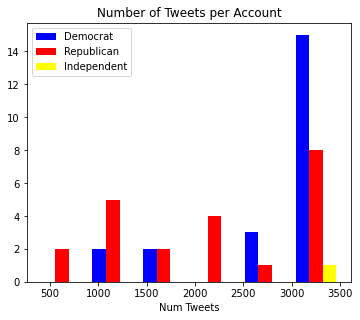

In [43]:
fig_1 = plt.figure(figsize = (5,4))
colors = ['blue','red','yellow']
axes_1 = fig_1.add_axes([0.1,0.1,0.9,0.9])
axes_1.hist([dem_tweet_counts, rep_tweet_counts, ind_tweet_counts], bins = 6, color = colors, label = ["Democrat", "Republican", "Independent"], align = 'right')
axes_1.legend(loc=0)
axes_1.set_xlabel("Num Tweets")
axes_1.set_title("Number of Tweets per Account")


In [31]:
np.random.randn(1000, 3)

array([[ 0.28964527,  0.63824153, -0.32065923],
       [ 0.66834383, -0.96091398, -2.70651038],
       [-1.40047373,  2.48516634,  2.16189738],
       ...,
       [-0.32409239, -0.72433669,  0.7391371 ],
       [ 0.43329008, -0.02918643, -1.55318459],
       [-0.56723217,  0.49481194, -0.97302001]])